# 📘 What is Complete Case Analysis (CCA)?

# Advantages of CCA

# ❌ Disadvantages of Complete Case Analysis

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('dsjob.csv')

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
df.isnull().mean()*100

# The expression df.isnull().mean() * 100 is used in pandas (Python) to calculate the percentage of missing values in each column of a DataFrame.

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [7]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

# in this we are iterating loop over the each columns and applying condition tha if our missing values are less than 5% and more than 0% then
# it will give us those column which have missing values.
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [8]:
df[cols].sample(5)

# 🔍 What’s happening:
# df[cols] → filters the DataFrame to include only the columns with <5% missing values.

# .sample(5) → randomly picks 5 rows from that filtered data.

,enrolled_university,education_level,experience,last_new_job
1750,no_enrollment,Masters,15,1
881,no_enrollment,High School,8,never
1974,no_enrollment,Graduate,4,2
1219,NaN,NaN,4,2
1171,no_enrollment,Masters,7,1


In [ ]:
# For Education Level

In [9]:
df['education_level'].value_counts()

education_level
Graduate          1269
Masters            496
High School        222
Phd                 54
Primary School      36
Name: count, dtype: int64

In [10]:
len(df[cols].dropna())/ len(df)

# calculates the proportion of rows in the entire DataFrame (df) that have no missing values in the selected cols.

0.9478628464067638

In [11]:
new_df = df[cols].dropna() #in this we drop missing data
df.shape, new_df.shape #in this we have seen data that is before droping and after droping

((2129, 13), (2018, 4))

In [13]:
import matplotlib.pyplot as plt

<Axes: >

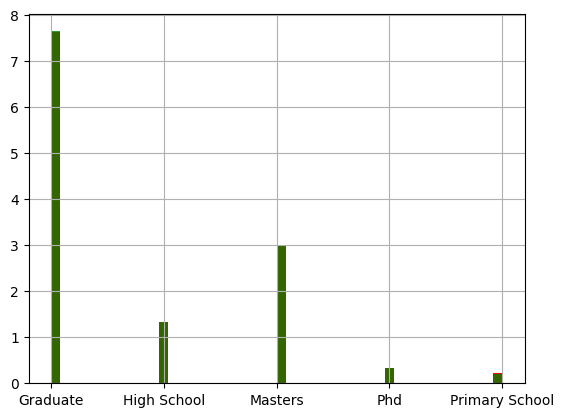

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['education_level'].hist(bins = 50,ax = ax,density = True,color = 'red')

# data after cca, the aregument alpha makes the color transparent, so we can 
# see the overlay of 2 distributions
new_df['education_level'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [27]:
temp = pd.concat([
    # percentage of observation per category, original data
    df['education_level'].value_counts()/len(df),

    # percentage of abbrivation per category, cca data
    new_df['education_level'].value_counts()/len(df)
    ],
    axis=1)
# add columns names
temp.columns = ['original','cca']

temp

,original,cca
education_level,,
Graduate,0.596054,0.579615
Masters,0.232973,0.226867
High School,0.104274,0.100986
Phd,0.025364,0.024894
Primary School,0.016909,0.015500


In [19]:
# For Enrolled University

In [25]:
df['enrolled_university'].value_counts()

enrolled_university
no_enrollment       1519
Full time course     435
Part time course     144
Name: count, dtype: int64

<Axes: >

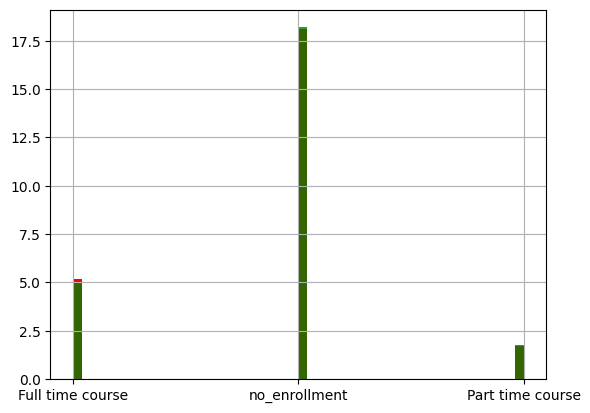

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['enrolled_university'].hist(bins = 50,ax = ax,density = True,color = 'red')

# data after cca, the aregument alpha makes the color transparent, so we can 
# see the overlay of 2 distributions
new_df['enrolled_university'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

In [30]:
temp = pd.concat([
    # percentage of observation per category, original data
    df['enrolled_university'].value_counts()/len(df),

    # percentage of abbrivation per category, cca data
    new_df['enrolled_university'].value_counts()/len(df)
    ],
    axis=1)
# add columns names
temp.columns = ['original','cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.689995
Full time course,0.204321,0.191639
Part time course,0.067637,0.066228
